# This machine learning is done using Jupyter Notebook with Anaconda. Here are some basic functions to help you get started with Ananconda. I recommend not to use the GUI version of Anancoda for some reasons it never downloaded/updated the packages I needed for this machine.
For that I simply used the Ananconda Powershell which can be accessed via start menu on windows.
Once you launch the Anaconda Powershell you will be in (base)  system.  Change that to your environment. Here is the procedure: Type these command
1.	conda create --name myenv (Name of your new environment) python=3.9 pandas numpy matplotlib seaborn scikit-learn imbalanced-learn
(Remember the name of your environment (or write it down) you will use it later.

2.	Conda activate myenv
3.	Jupyter notebook  (will open in a default browser)
Happy Learning 


Imported All the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from imblearn.over_sampling import SMOTE
import joblib


In [2]:
# Source: https://www.kaggle.com/aakash50897/churn-modellingcsv
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# ignore the warning.
#  Args generally means arguments.
# Kwargs generally represents keyword arguments
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Exploring data frame:

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Total numbers of rows and columns in the data frame :

In [5]:
df.shape

(10000, 14)

# Gathering Information About the Columns of the Data Frame :

In [6]:
# Data types, missing values, and memory use for each column in the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Displaying first 20 rows of data frame:

In [8]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Count the missing values in the columns of the data frame:

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Categorical and numeric variables each have an own set of values:

In [10]:
df["Geography"].unique(),df["Gender"].unique(), df.NumOfProducts.unique(), df.HasCrCard.unique(), df.IsActiveMember.unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([1, 3, 2, 4], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64))

# Remove the redundant columns from the data frame:

In [11]:
df = df.drop(['CustomerId','RowNumber','Surname'], axis = "columns")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Transposing the data frame.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


# Value counts for Class Exited column:

In [13]:
ValueCounts = df['Exited'].value_counts()
print(ValueCounts)

Exited
0    7963
1    2037
Name: count, dtype: int64


# A bar graph for Class Exited column:

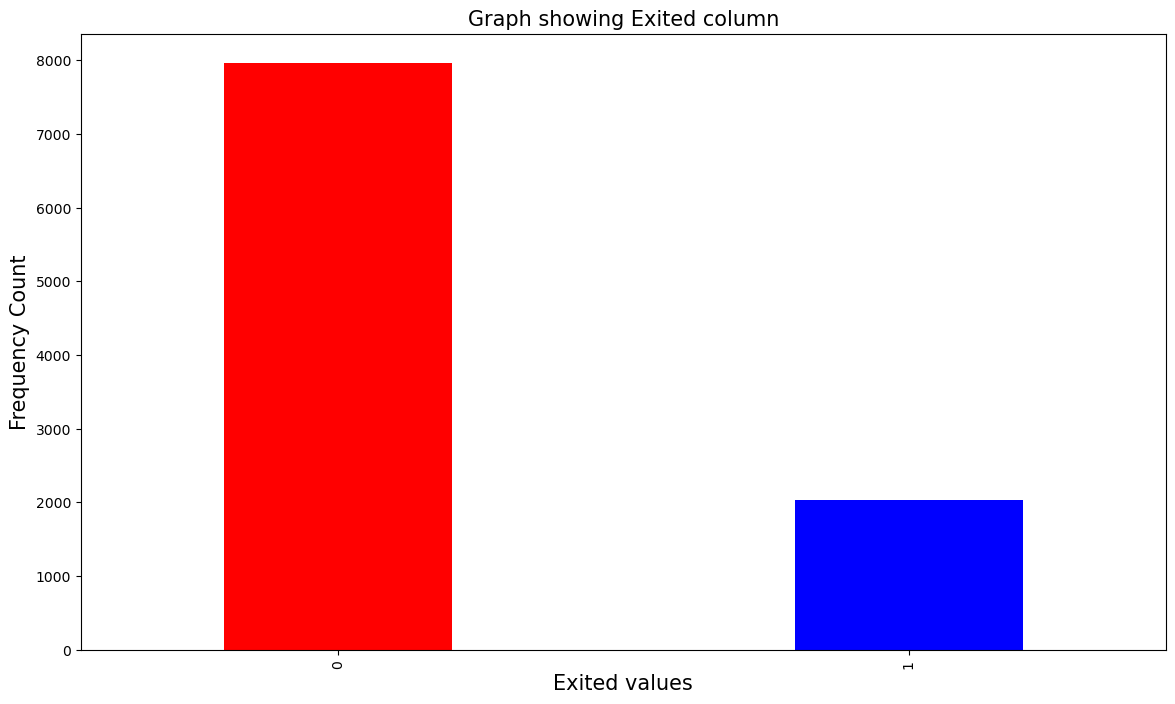

In [14]:
# In order to deal with imbalance data, resampling dataset.
ax = ValueCounts.plot(kind='bar',figsize=(14,8), width=0.40 ,color=['red','blue'])
ax.set_xlabel("Exited values",fontsize=15)
ax.set_ylabel("Frequency Count",fontsize=15)
ax.set_title( 'Graph showing Exited column' ,fontsize = 15)
plt.show()

# Categorical Encoding

In [15]:
df1 = pd.get_dummies(df,columns = ['Geography','Gender'])
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


# Correlation Matrix with Heatmap

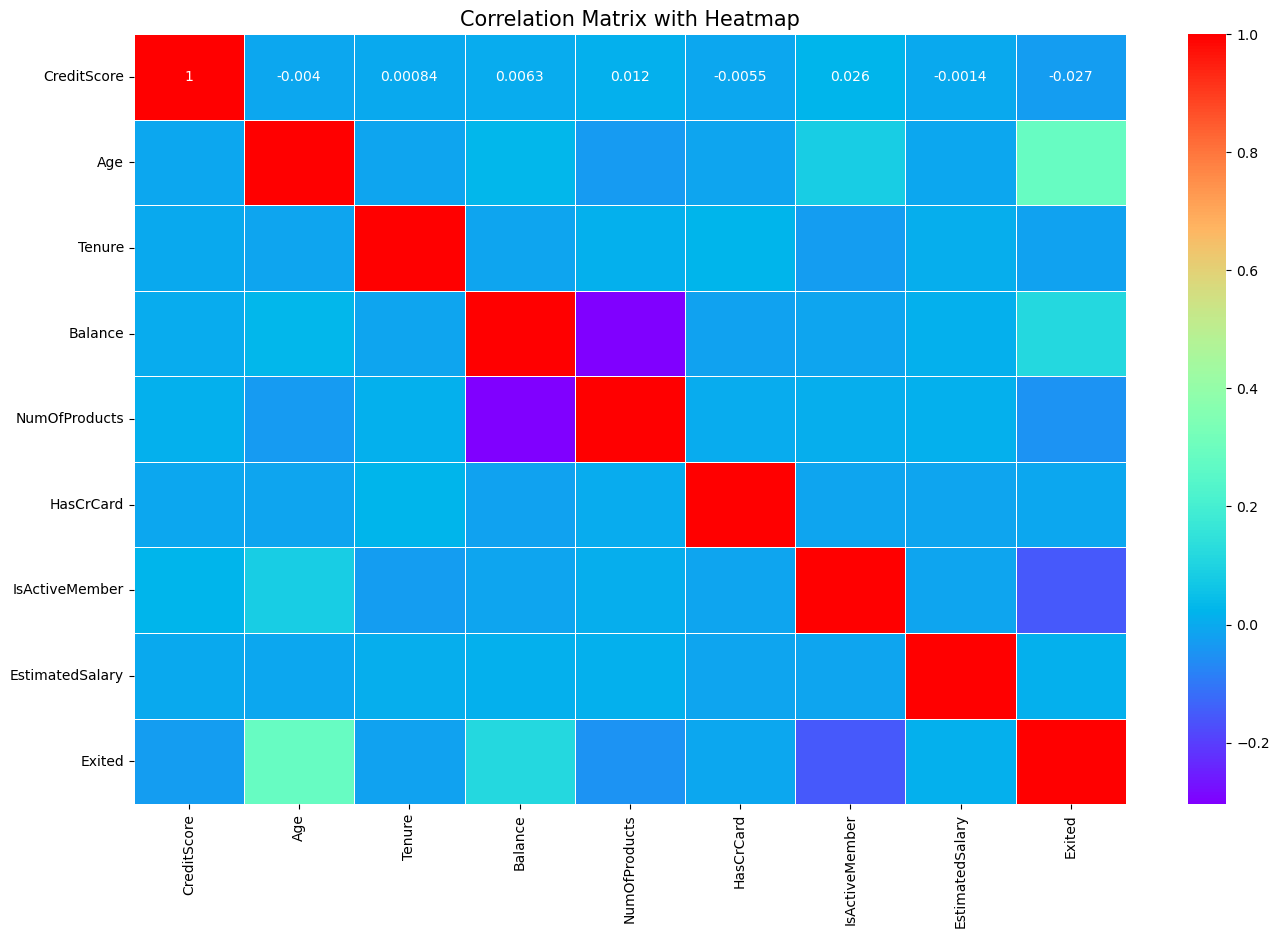

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains your data
# Drop non-numeric columns or encode categorical columns
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns

# Create a correlation matrix and plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=.5, cmap="rainbow")
plt.title('Correlation Matrix with Heatmap', fontsize=15)
plt.show()


# Indexing and selecting data: Feature storage in a "X" matrix and response class storage in a "y" vector

In [17]:
X = df1.loc[:,df1.columns != 'Exited']
y = df1['Exited']

#  Synthetic Minority Oversampling Technique (SMOTE) for Imbalanced Classification

In [18]:
#Features
X = df1.loc[:,df1.columns != 'Exited']
#Response
y = df1['Exited']

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X1, y1 = sm.fit_resample(X, y)

 # After resampling, the following graph displays the value counts for the Exited column:

Text(0, 0.5, 'Frequency Count')

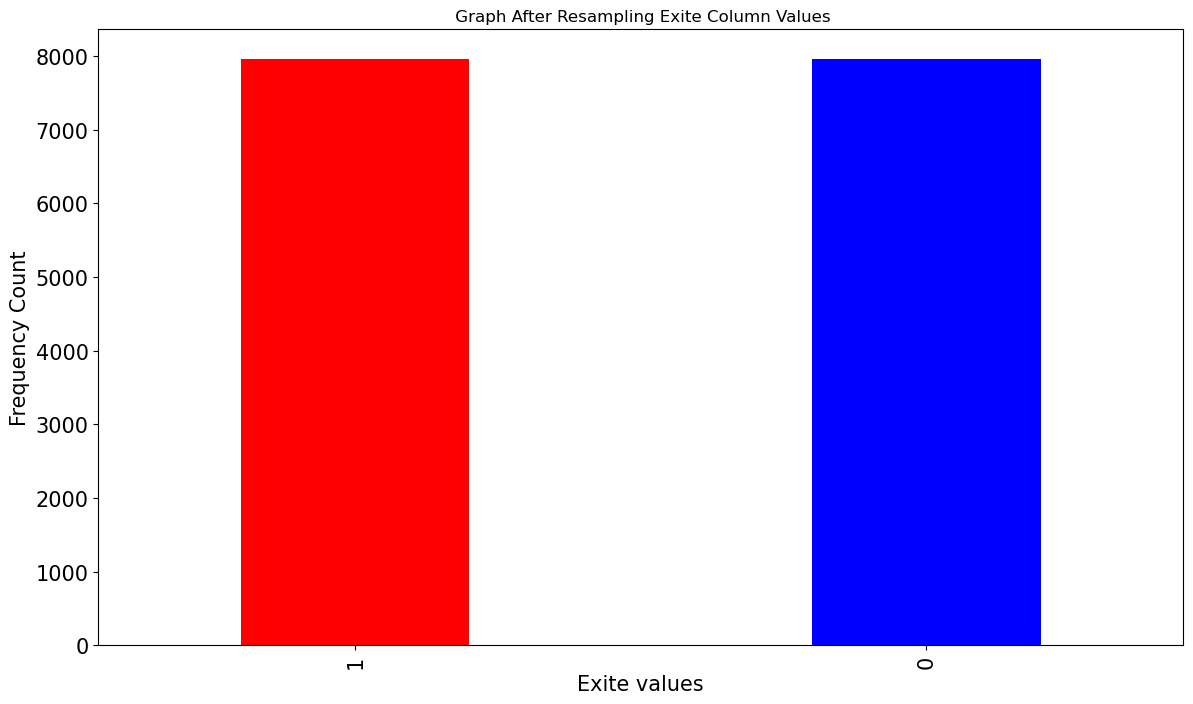

In [20]:
ValueCounts = pd.Series(np.array(y1)).value_counts()

ax = ValueCounts.plot(kind='bar',figsize=(14,8), width=0.40 ,fontsize=15,color=['red','blue'], title=' Graph After Resampling Exite Column Values' )
ax.set_xlabel("Exite values",fontsize=15)
ax.set_ylabel("Frequency Count",fontsize=15)
# The number of Exited and non-Exited values in the data set is now equal.

# Combining Resampled Features and response


In [21]:
df2 = pd.concat([pd.DataFrame(X1), pd.Series(y1)], axis=1)
df2.columns = df1.columns
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,1
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,0
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,1
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,0


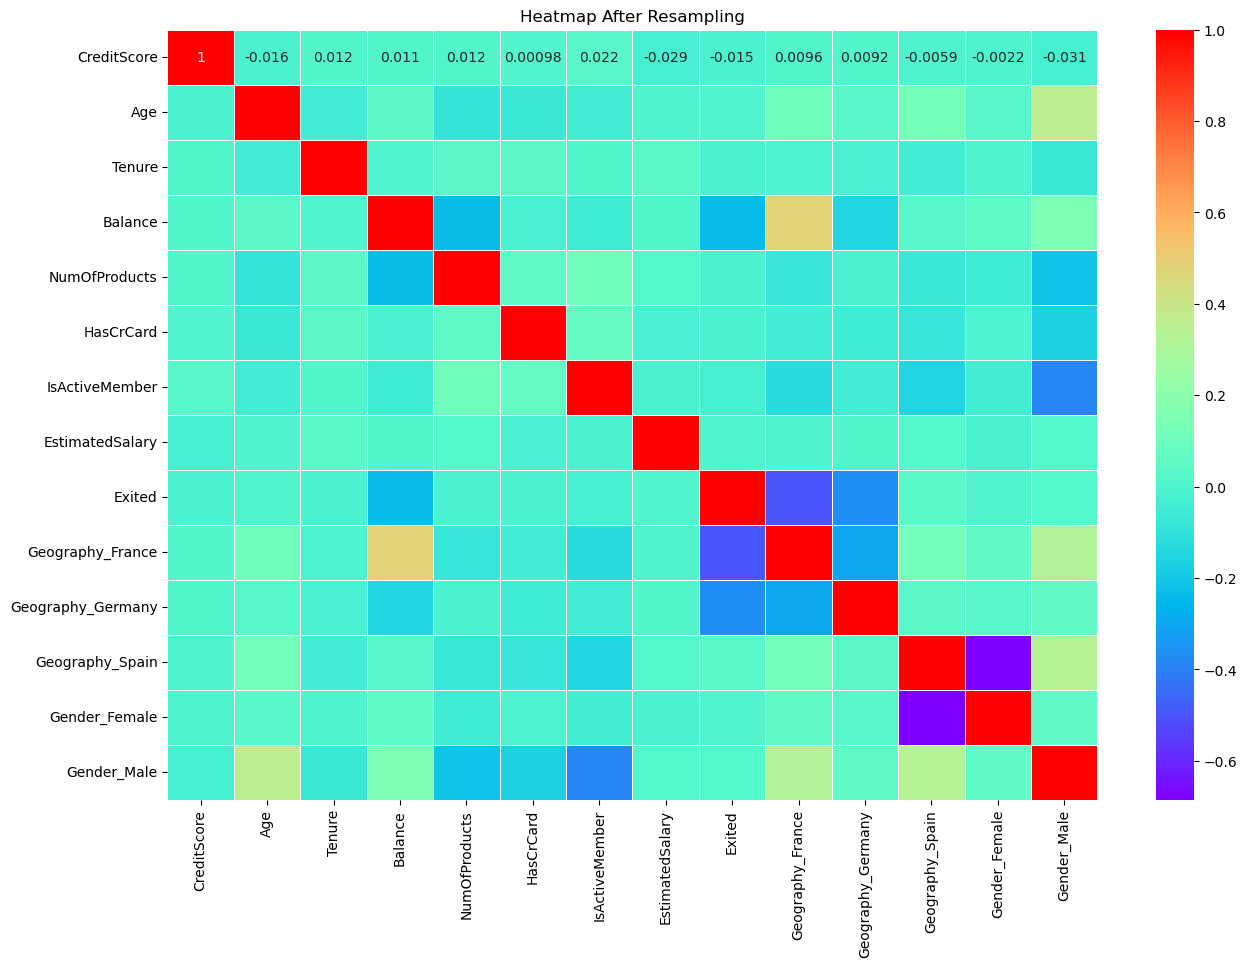

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True,linewidths=.5, cmap="rainbow")
plt.title('Heatmap After Resampling')
plt.show()

# Data Evaluation and Exploratory Data Analysis (EDA)

# See how many columns there are and how they are distributed:

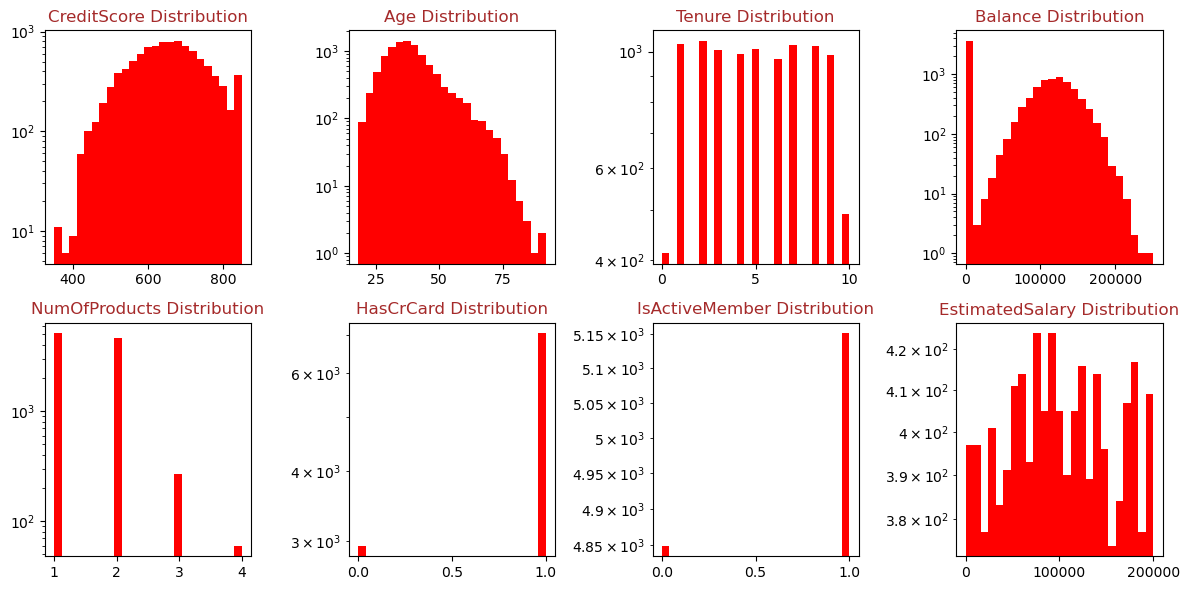

In [23]:
fig, axes = plt.subplots(2,4,figsize=(12,6))
feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for i, ax in enumerate(axes.flatten()):
    ax.hist(df[feats[i]], bins=25, color='red')
    ax.set_title(str(feats[i])+' Distribution', color='brown')
    ax.set_yscale('log')
plt.tight_layout()

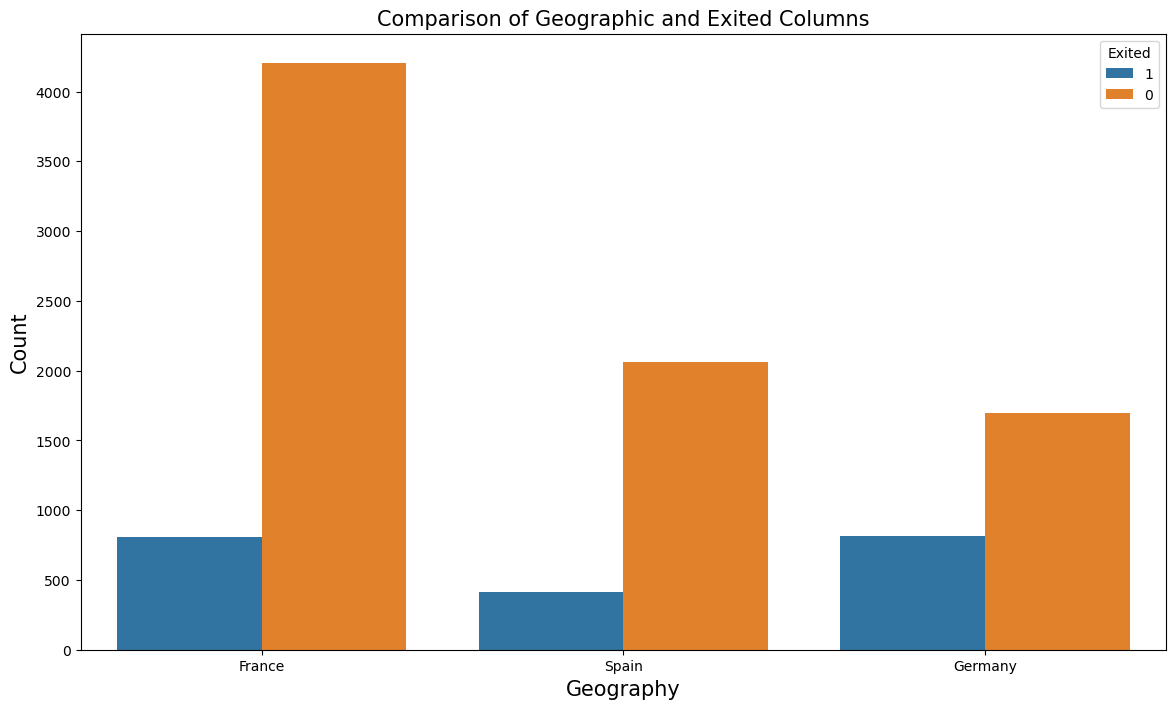

In [24]:
# Comparison of Geographic and Exited Columns in a Count Plot
# Convert columns to appropriate data types if needed
df['Geography'] = df['Geography'].astype(str)  # Convert to string type if not already
df['Exited'] = df['Exited'].astype(str)  # Convert to string type if not already
# If 'Exited' is numeric (binary), ensure it's converted to categorical if needed
# For example:
# df['Exited'] = df['Exited'].astype('category')

# Plot the countplot
plt.figure(figsize=(14, 8))
ax = sns.countplot(x="Geography", hue="Exited", data=df)
ax.set_xlabel("Geography", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.set_title('Comparison of Geographic and Exited Columns', fontsize=15)
plt.show()


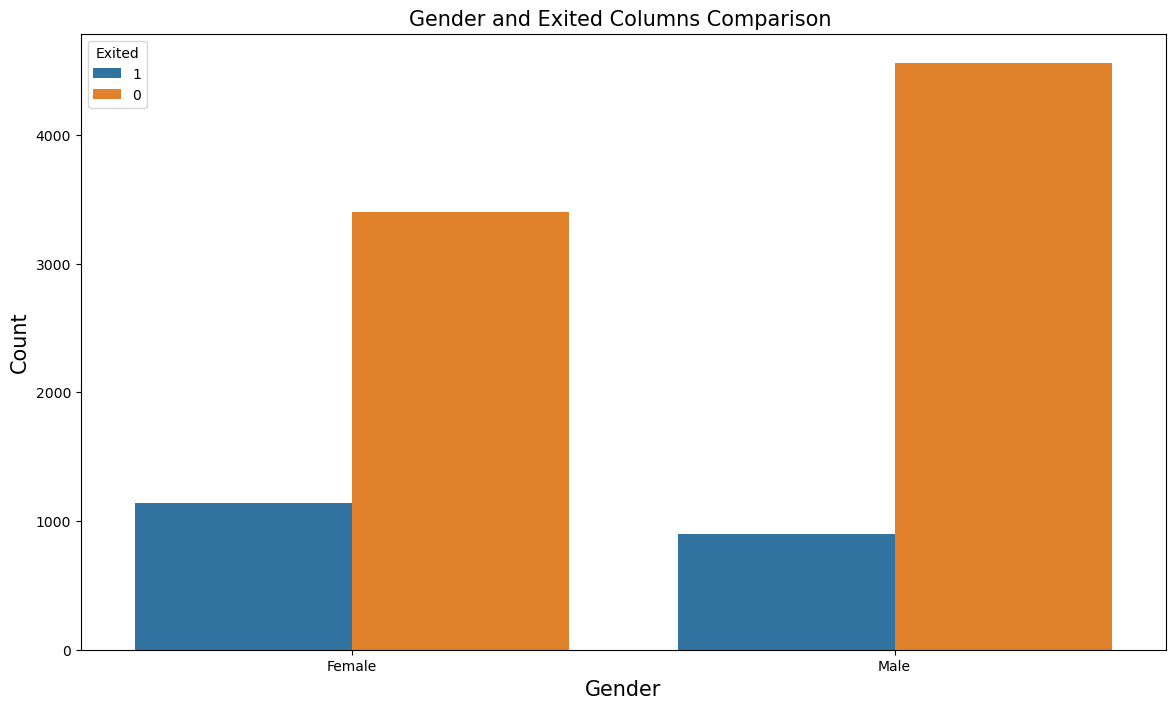

In [25]:
# Gender and Exited Columns Comparison Plotted as A Count
plt.figure(figsize=(14,8))
ax = sns.countplot(x="Gender", hue="Exited", data=df)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Gender and Exited Columns Comparison ',fontsize=15)
plt.show()

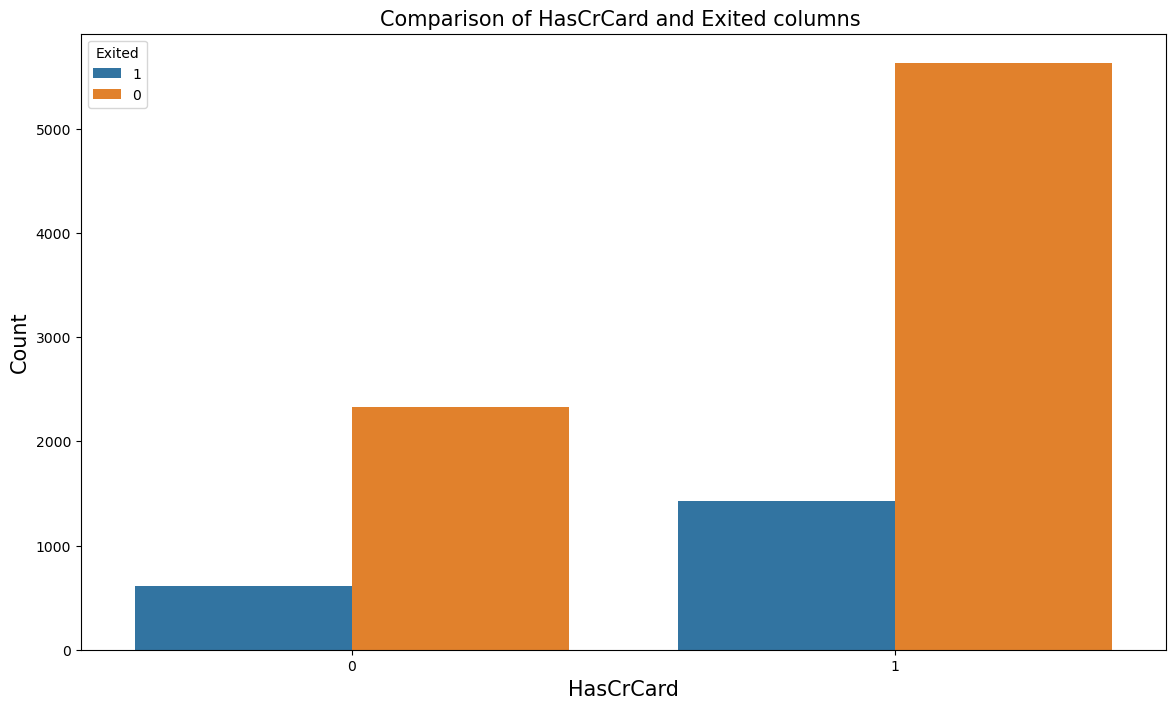

In [26]:
# Comparison of HasCrCard and Exited columns in a Count plot
plt.figure(figsize=(14,8))
ax = sns.countplot(x="HasCrCard", hue="Exited", data=df)
ax.set_xlabel("HasCrCard",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Comparison of HasCrCard and Exited columns ',fontsize=15)
plt.show()

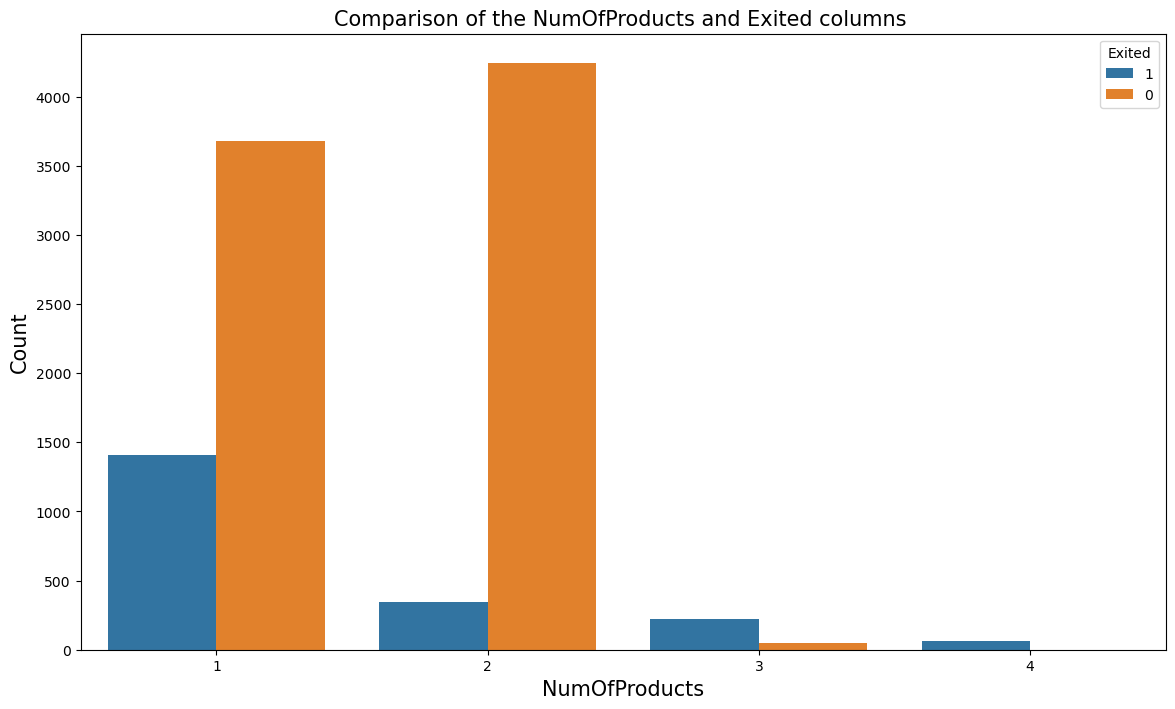

In [27]:
# A comparison of the NumOfProducts and Exited columns using a count plot :
plt.figure(figsize=(14,8))
ax = sns.countplot(x="NumOfProducts", hue="Exited", data=df)
ax.set_xlabel("NumOfProducts",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Comparison of the NumOfProducts and Exited columns ',fontsize=15)
plt.show()

In [28]:
# Each gender's Exited Rate is shown in a bar graph.
# Check the data type of the 'Exited' column
print(df['Exited'].dtype)

# If it's not a numeric type, attempt to convert it to numeric
# For example, if 'Exited' contains strings, you can convert them to numeric values
df['Exited'] = pd.to_numeric(df['Exited'], errors='coerce')
# 'errors='coerce'' will convert non-convertible values to NaN

# Now, calculate the mean of 'Exited' based on 'Gender'
Gender_exit_rate = df.groupby('Gender')['Exited'].mean()
print(Gender_exit_rate)


object
Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


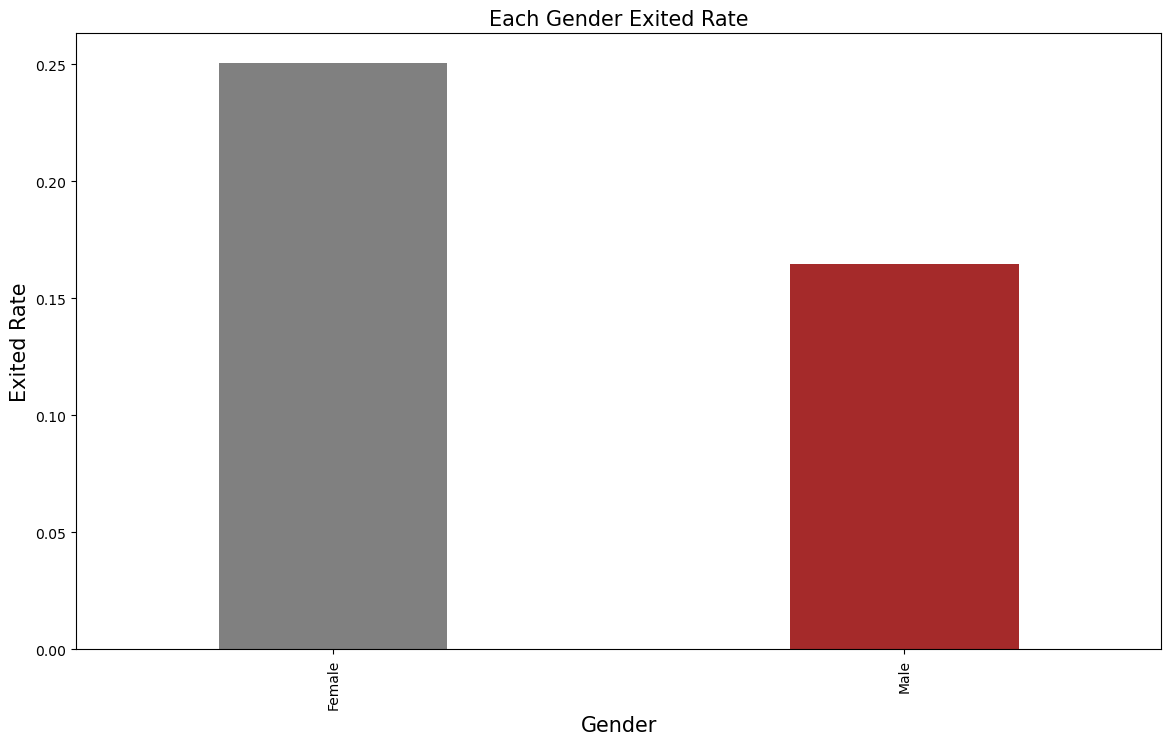

In [30]:
import pandas as pd

# Assuming df is your DataFrame containing 'Gender' and 'Exited' columns
Gender_exit_rates = df.groupby('Gender')['Exited'].mean()

# Plotting the bar chart
ax = Gender_exit_rates.plot(kind='bar', figsize=(14, 8), width=0.4, color=['gray', 'brown'])
ax.set_xlabel("Gender", fontsize=15)
ax.set_ylabel("Exited Rate", fontsize=15)
ax.set_title('Each Gender Exited Rate', fontsize=15)
plt.show()


In [31]:
# The Exited Rate for each Tenure is shown in a bar graph.
Tenure_exite_rate = df.groupby('Tenure').Exited.mean()
Tenure_exite_rate

Tenure
0     0.230024
1     0.224155
2     0.191794
3     0.211100
4     0.205258
5     0.206522
6     0.202689
7     0.172179
8     0.192195
9     0.216463
10    0.206122
Name: Exited, dtype: float64

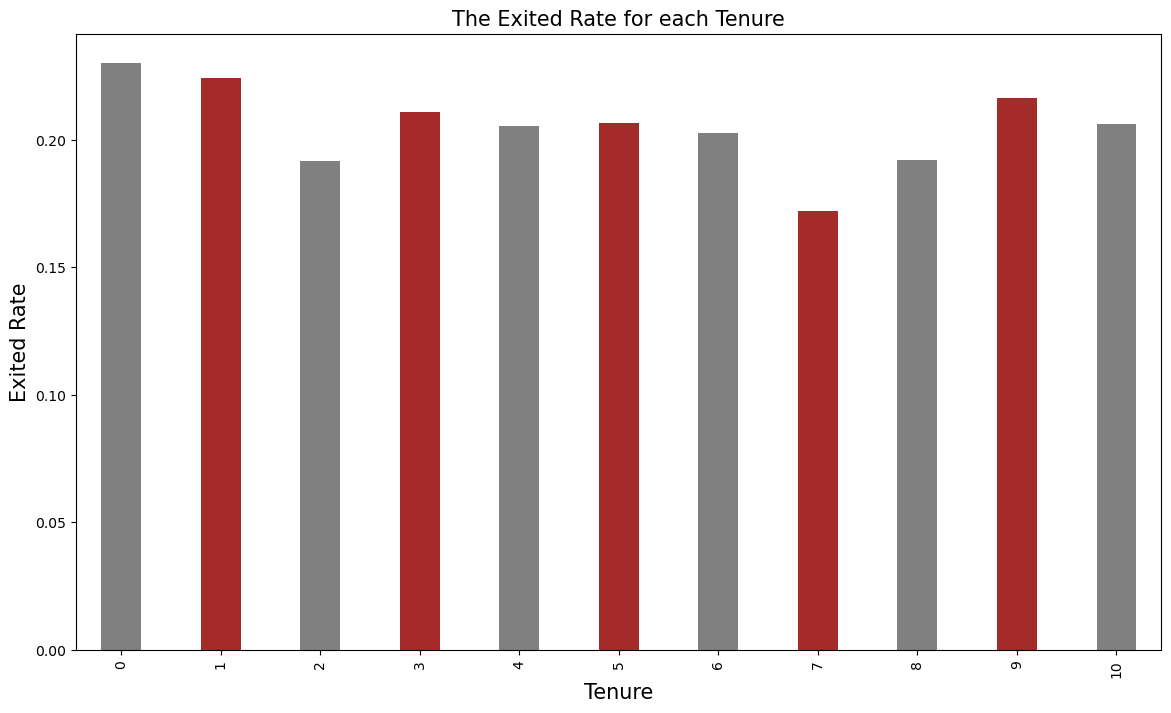

In [32]:
ax = Tenure_exite_rate.plot(kind='bar',figsize=(14,8), width=0.40 ,color=['gray','brown'])
ax.set_xlabel("Tenure",fontsize=15)
ax.set_ylabel("Exited Rate",fontsize=15)
ax.set_title( 'The Exited Rate for each Tenure' ,fontsize = 15)
plt.show()

In [33]:
#  Each CreditScore's Exit Rate is plotted in a scatter plot.
CreditScore_Exite_rate = df.groupby('CreditScore').Exited.mean()
CreditScore_Exite_rate

CreditScore
350    1.000000
351    1.000000
358    1.000000
359    1.000000
363    1.000000
         ...   
846    0.400000
847    0.333333
848    0.000000
849    0.250000
850    0.184549
Name: Exited, Length: 460, dtype: float64

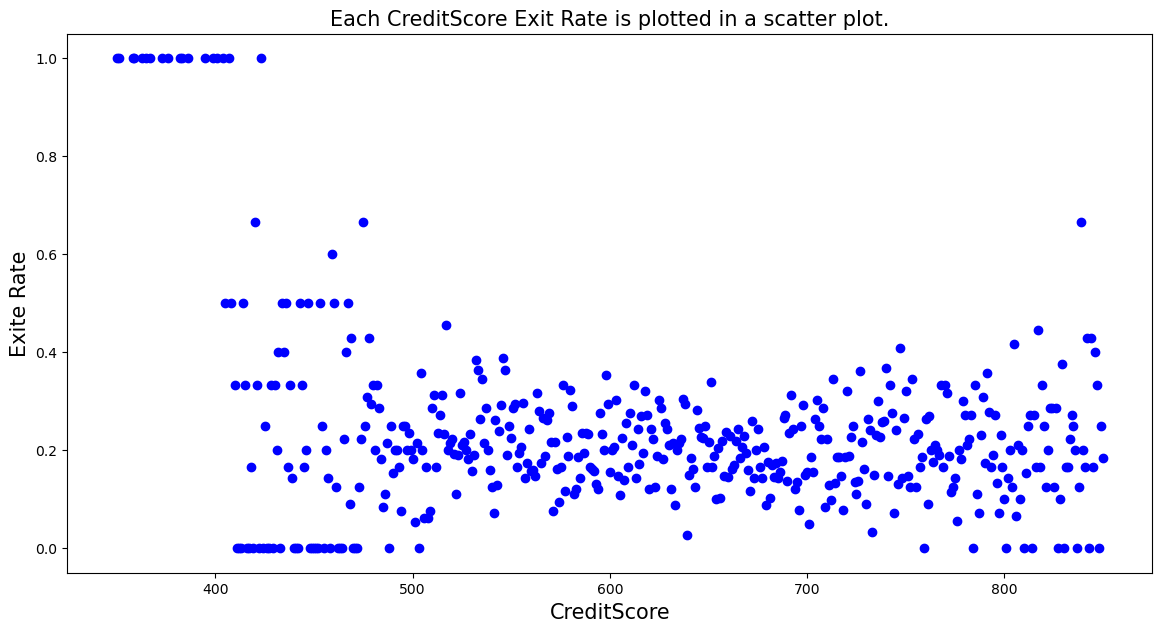

In [34]:
plt.figure(figsize = (14,7))
plt.scatter(x=CreditScore_Exite_rate.index , y= CreditScore_Exite_rate.values,color = 'blue',marker = 'o',)
plt.xlabel('CreditScore',fontsize = 15)
plt.ylabel('Exite Rate',fontsize = 15)
plt.title('Each CreditScore Exit Rate is plotted in a scatter plot.',fontsize = 15)
plt.show()

In [35]:
# Scatter plot showing Exite Rate for Age
Age_Exite_rate = df.groupby('Age').Exited.mean()
Age_Exite_rate

Age
18    0.090909
19    0.037037
20    0.050000
21    0.056604
22    0.142857
        ...   
83    0.000000
84    0.500000
85    0.000000
88    0.000000
92    0.000000
Name: Exited, Length: 70, dtype: float64

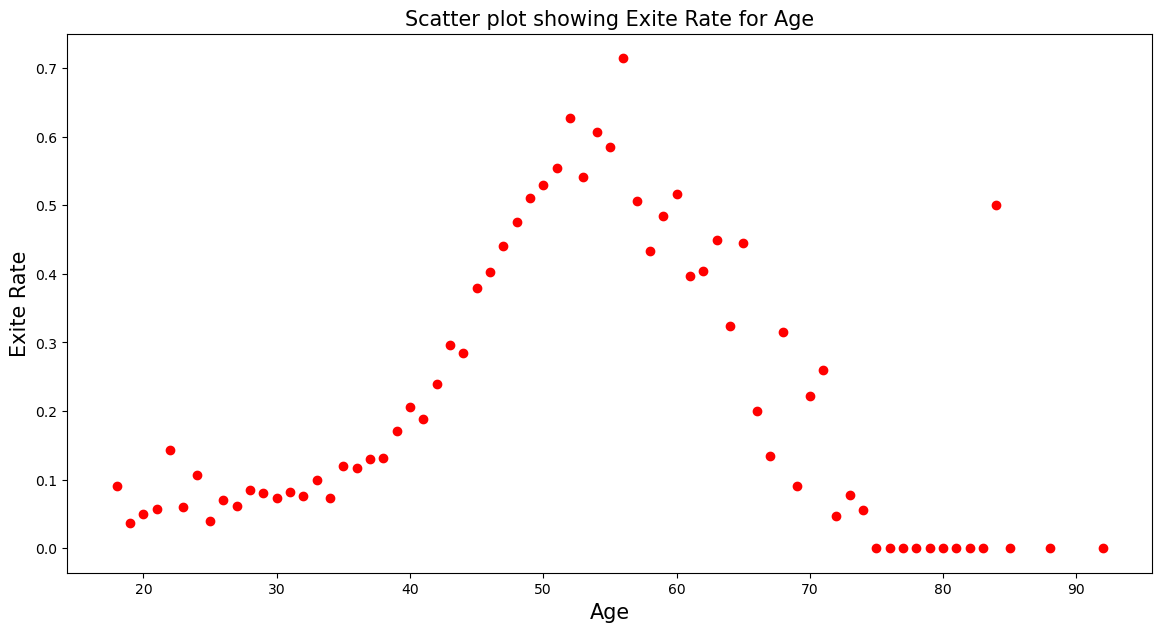

In [36]:
plt.figure(figsize = (14,7))
plt.scatter(x=Age_Exite_rate.index , y= Age_Exite_rate.values,color = 'red',marker = 'o',)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Exite Rate',fontsize = 15)
plt.title('Scatter plot showing Exite Rate for Age',fontsize = 15)
plt.show()

# Before attempting to model the data, here are some general statistics:

In [37]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


 # Model Selection

In [38]:
 # Divide the dataset to create a training(80%) and a testing set(20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

In [39]:
# Shapes for training and testing sets:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12740, 13), (3186, 13), (12740,), (3186,))

# Baseline Models:

In [40]:
# Model 1 : Decision Tree
# Importing DecisionTreeClassifier from tree in sklearn:
from sklearn.tree import DecisionTreeClassifier

In [41]:
Dt_classifier = DecisionTreeClassifier()

In [42]:
Dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
# Make predictions using test data on Decision Tree model:
y_pred = Dt_classifier.predict(X_test)

In [44]:
# Accuracy and Confusion matrix of Decision Tree Model:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix Decision Tree:\n',confusion_matrix(y_test,y_pred))
accu_dt = accuracy_score(y_test,y_pred)
print(' Accuracy Decision Tree:\n',accu_dt,'\n')

Confusion Matrix Decision Tree:
 [[1314  276]
 [ 219 1377]]
 Accuracy Decision Tree:
 0.844632768361582 



In [45]:
# Model 2 : Support Vector Machine Model:
# Importing SVC from sklearn.svm class:
from sklearn.svm import SVC

In [46]:
# Build SVM classifier using rbf kernal as parameter:
Svc_classifier = SVC()

In [47]:
# Call 'fit' function of the SVM model to train it:
Svc_classifier.fit(X_train, y_train)

SVC()

In [48]:
# Make predictions using test data on SVM model:
y_pred = Svc_classifier.predict(X_test)

In [49]:
# Accuracy and Confusion matrix of SVM Model:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix SVM:\n',confusion_matrix(y_test,y_pred))
accu_svm = accuracy_score(y_test,y_pred)
print(' Accuracy SVM:\n',accu_svm,'\n')

Confusion Matrix SVM:
 [[ 588 1002]
 [ 394 1202]]
 Accuracy SVM:
 0.5618330194601381 



In [50]:
# Model 3 : Random Forest
# Importing RandomForestClassifier from ensemble class in sklearn:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Build RandomForestClassifier using default parameters :
Rf_classifier = RandomForestClassifier()

In [52]:
# Train the random forest on training data:
Rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
# Make predictions using test data on Random forest model:
y_pred = Rf_classifier.predict(X_test)

In [54]:
# Accuracy and Confusion matrix of random forest Model:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix Random Forest:\n',confusion_matrix(y_test,y_pred))
accu_rf = accuracy_score(y_test,y_pred)
print(' Accuracy Random Forest:\n',accu_rf,'\n')

Confusion Matrix Random Forest:
 [[1433  157]
 [ 195 1401]]
 Accuracy Random Forest:
 0.8895166352793471 



In [55]:
# Model 4 : Logistic Regression
# Importing LogisticRegression from sklearn linear_model:
from sklearn.linear_model import LogisticRegression

In [56]:
#Build Logistic Regression classifier using default parameters:
Lg_classifier = LogisticRegression()

In [57]:
# Call 'fit' function of the created model:
Lg_classifier.fit(X_train, y_train)

LogisticRegression()

In [58]:
# Create predictions by calling 'predict' function of the fitted model:
y_pred = Lg_classifier.predict(X_test)
y_pred[0:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [59]:
# Accuracy and Confusion matrix of Logistic Regression Model:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix Logistic Regression:\n',confusion_matrix(y_test,y_pred))
accu_lg = accuracy_score(y_test,y_pred)
print(' Accuracy Logistic Regression:\n',accu_lg,'\n')

Confusion Matrix Logistic Regression:
 [[1040  550]
 [ 474 1122]]
 Accuracy Logistic Regression:
 0.6785938480853735 



In [60]:
# Model 5 : K-Nearest Neighbor Model
# Importing KNeighborsClassifier from sklearn neighbors class:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
# Build KNeighborsClassifier using n_neighbors = 5 parameter:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [62]:
# Call 'fit' function of the created KNN model:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
# Make predictions by calling 'predict' function of the fitted KNN model:
y_pred = knn_classifier.predict(X_test)

In [64]:
# Accuracy and Confusion matrix of KNN Model:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix KNN Model:\n',confusion_matrix(y_test,y_pred))
accu_knn = accuracy_score(y_test,y_pred)
print(' Accuracy KNN Model:\n',accu_knn,'\n')

Confusion Matrix KNN Model:
 [[ 952  638]
 [ 380 1216]]
 Accuracy KNN Model:
 0.6804770872567483 



In [65]:
# Model 6 : Naive Bayes Model:
# Importing GaussianNB from sklearn naive_bayes class:
from sklearn.naive_bayes import GaussianNB

In [66]:
# Build GaussianNB using default parameters:
NB_classifier = GaussianNB()

In [67]:
# Call 'fit' function of the created Naive bayes model:
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [68]:
# Make predictions by calling 'predict' function of the fitted Naive Bayes model:
y_pred = NB_classifier.predict(X_test)

In [69]:
# Accuracy and Confusion matrix of NaiveBayes Model:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix Naive Bayes:\n',confusion_matrix(y_test,y_pred))
accu_nb = accuracy_score(y_test,y_pred)
print(' Accuracy Naive Bayes Model:\n',accu_nb,'\n')

Confusion Matrix Naive Bayes:
 [[1072  518]
 [ 362 1234]]
 Accuracy Naive Bayes Model:
 0.7237915881983679 



# Comparing different machine learning models (model selection) in terms of accuracy:

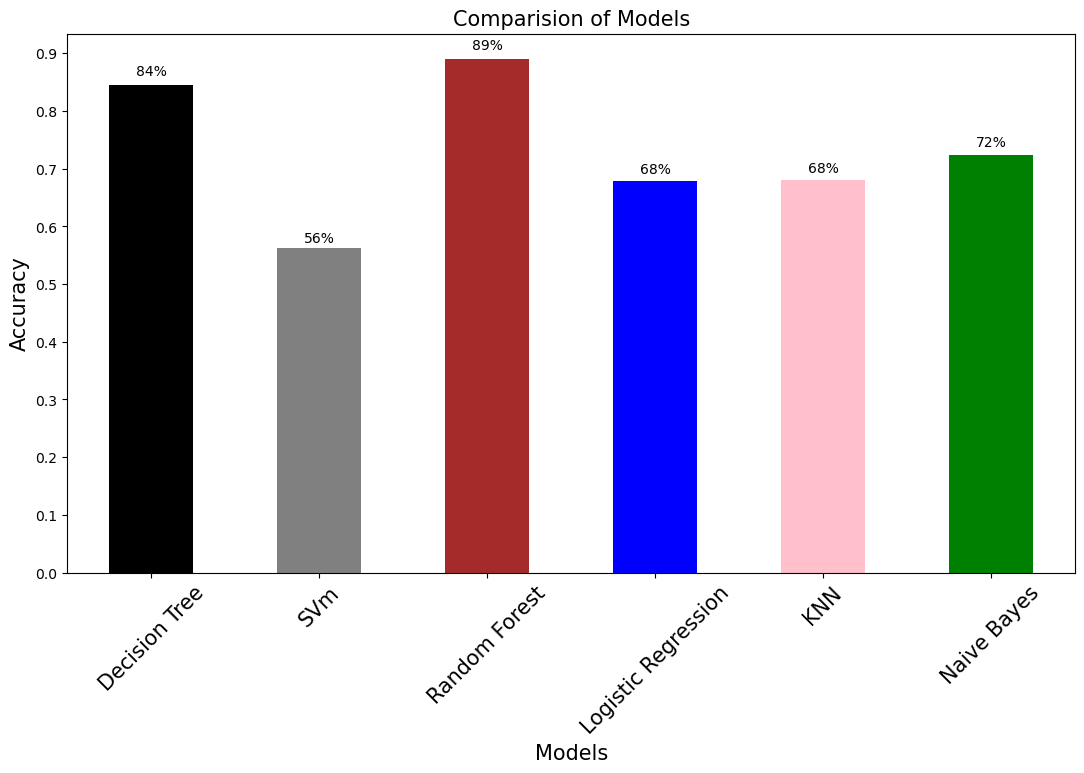

In [70]:
results = pd.Series([accu_dt , accu_svm, accu_rf, accu_lg, accu_knn, accu_nb  ])
names = ['Decision Tree','SVm','Random Forest','Logistic Regression','KNN','Naive Bayes']
ax = results.plot(kind = 'bar',figsize=(13,7),color=['black','gray','brown','blue','pink','green'])
ax.set_title('Comparision of Models',fontsize=15)
ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_xticklabels(names ,fontsize=15,rotation = 45)
ax.set_xlabel("Models",fontsize=15)
ax.set_ylabel("Accuracy",fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [71]:
# From the above comparison we see that Random Forest gave the highest Performance in terms of accuracy hence we select Random Forest Model as our selecton.~

# Model Evaluation

In [72]:
# Train & Evaluate Chosen Model:
# Analyze how well the chosen model(Random Forest) performs by running it through a training dataset.
Selected_classifier = RandomForestClassifier(random_state = 0)
Selected_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = Selected_classifier.predict(X_test)
#Evaluate Model Results on Test Set:
from sklearn.metrics import precision_score,recall_score,f1_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, ]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score',])
print (results)

           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.895166   0.906049  0.882206  0.893968


In [73]:
# k-Fold Cross-Validation for Random Forest:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Selected_classifier, X = X_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(),  accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.89 (+/- 0.01)


In [74]:
# As a result of our k-fold Cross Validation results, accuracy would range between 89 and 90 percent when running this model on any test set.

In [75]:
# Evaluate with Confusion Matrix:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1444  146]
 [ 188 1408]]


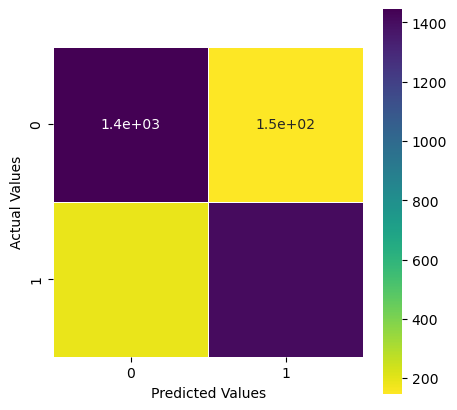

In [76]:
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True, cmap='viridis_r')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [77]:
# We obtained an accuracy of 89 percent, which is consistent with a reasonably excellent model.

# Model Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the grid of parameters for GridSearchCV
grid_values = {
    'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 20, 50, 100]  # Adjusted integer values for min_samples_split
}

# Initialize the Random Forest Classifier
Selected_classifier = RandomForestClassifier()  # Modify with your chosen hyperparameters

# Initialize GridSearchCV using Random Forest Classifier, CV=10 and accuracy as the scoring metric
Grid_classifier_rf = GridSearchCV(Selected_classifier, grid_values, cv=10, scoring='accuracy')

# Fit GridSearchCV to your data (assuming 'X_train' and 'y_train' are your training data)
Grid_classifier_rf.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = Grid_classifier_rf.best_params_
print("Best Parameters:", best_params)

# Get the best estimator (model) found by GridSearchCV
best_model = Grid_classifier_rf.best_estimator_

# Now you can use 'best_model' for predictions or further evaluation


In [ ]:
# Fit the Grid_classifier_rf with features and responses:
Grid_classifier_rf.fit(X_train,y_train)

In [ ]:
# The best parameters given by GridSearchCV on Random Forest Model:


In [ ]:
Grid_classifier_rf.best_params_

In [ ]:
Grid_classifier_rf.best_score_

In [ ]:
# The best estimator given by GridSearchCV :
Grid_classifier_rf.best_estimator_

In [ ]:
# Build the Random Forest model again with the best parameters given by GridSearchCV (tuned model):
Tuned_classifier = RandomForestClassifier(criterion  = 'gini', min_samples_split = 1e-20, n_estimators =  55)

In [ ]:
Tuned_classifier.fit(X_train,y_train)

# Future Predictions

In [ ]:
# Make predictions on test data and show first 60 predicted values:
y_pred = Tuned_classifier.predict(X_test)
y_pred[0:60]

In [ ]:
# Compare the true values and predicted values of Exited column for tuned model:
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comp.head(20)

In [ ]:
# Accuracy and Confusion matrix for Tuned Random Forest Model:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix Tuned Random Forest:\n',confusion_matrix(y_test,y_pred))
tuned_accu = accuracy_score(y_test,y_pred)
print(' Accuracy Tuned Random Forest:\n',tuned_accu,'\n')

# Model Deployment

In [ ]:
# Deploy the model to a server using ‘joblib’ library so that we can productionize the end-to-end machine learning framework. Later we can run the model over any new dataset to predict the probability of any customer to churn in months to come.
# pip install joblib
#to install the package
filename = 'final_model.model'
i = [Tuned_classifier]
joblib.dump(i,filename)